Boston crime incidence data is analyzed to obtain insights on crime occuring in Boston. This insight helps the law enforcement agency to take precautionary action and when properly done, it reduces the crime rate of boston.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

imported the excel file into pandas

In [2]:
crime=pd.read_excel('crimeb.xlsx')

In [3]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


using isnull to check how many null value present in the data 

In [5]:
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

FOR ALL SHOOTING THAT IS EMPTY, FILL IT UP WITH 0 MEANING NO SHOOTING HAPPENED THERE AND FOR EVERY ROW WITH 'Y' REPLACE WITH 1
SINCE THE DATA SAID 'Y' MEANS SHOOTING OCCURRED 

In [11]:
crime['SHOOTING']= crime['SHOOTING'].fillna(0)
crime['SHOOTING'].replace('Y',1, inplace=True)

DROP EVERY OTHER EMPTY ROW TO HAVE A CLEAN DATA

In [12]:
crime.dropna(inplace=True)

In [13]:
crime.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

CHECK THE TOTAL INFORMATION OF THE DATA USING INFO(). CHECKING THE COLUMN NAME, THE TYPE OF DATA OBTAINED IN THE COLUMN, HOW MANY ROWS AND NULL VALUES 

In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296573 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      296573 non-null  object        
 1   OFFENSE_CODE         296573 non-null  int64         
 2   OFFENSE_CODE_GROUP   296573 non-null  object        
 3   OFFENSE_DESCRIPTION  296573 non-null  object        
 4   DISTRICT             296573 non-null  object        
 5   REPORTING_AREA       296573 non-null  object        
 6   SHOOTING             296573 non-null  int64         
 7   OCCURRED_ON_DATE     296573 non-null  datetime64[ns]
 8   YEAR                 296573 non-null  int64         
 9   MONTH                296573 non-null  int64         
 10  DAY_OF_WEEK          296573 non-null  object        
 11  HOUR                 296573 non-null  int64         
 12  UCR_PART             296573 non-null  object        
 13  STREET        

CHECK THE STATISTICS WITH '.DESCRIBE() OF THE DATA TO UNDERSTAND ITS DISTRIBUTION 

In [15]:
crime.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
count,296573.000000,296573.000000,296573.000000,296573.000000,296573.000000,296573.000000,296573.000000
mean,2293.856737,0.003274,2016.550954,6.611856,13.124576,42.300079,-71.046943
std,1182.909512,0.057126,1.001118,3.279314,6.278383,0.981040,1.586477
min,111.000000,0.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,802.000000,0.000000,2016.000000,4.000000,9.000000,42.297521,-71.097223
50%,2907.000000,0.000000,2017.000000,7.000000,14.000000,42.325574,-71.077562
75%,3201.000000,0.000000,2017.000000,9.000000,18.000000,42.348624,-71.062529
max,3831.000000,1.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


TOTAL NUMBER OF SHOOTING

In [16]:
crime['SHOOTING'].sum()

971

EXPLORING THE DATA BY GROUPING THE SHOOTING INTO YEARS TO UNDERSTAND THE SHOOTING PER YEAR 

In [18]:
shooting_rate=crime.groupby('YEAR').sum()
shooting_rate.sort_values('SHOOTING',ascending=True, inplace=True)
shooting_rate.head()

,OFFENSE_CODE,SHOOTING,MONTH,HOUR,Lat,Long
YEAR,,,,,,
2018,141822607,169,283196,795421,2.569542e+06,-4.315833e+06
2015,111595060,178,470094,666387,2.164921e+06,-3.636112e+06
2016,209300743,267,598184,1205624,3.872388e+06,-6.504058e+06
2017,217577564,357,609424,1224963,3.938209e+06,-6.614602e+06


TO KNOW THE MOST COMMITTED CRIME, I USED VALUE COUNT AND ILOC TO GET THE 10 MOST COMMITTED CRIME.

In [19]:
most_offence=crime.OFFENSE_DESCRIPTION.value_counts().iloc[:10].sort_values()

In [20]:
most_offence

THREATS TO DO BODILY HARM                 8786
LARCENY THEFT FROM BUILDING               8870
INVESTIGATE PROPERTY                     10594
TOWED MOTOR VEHICLE                      10736
VERBAL DISPUTE                           12947
ASSAULT SIMPLE - BATTERY                 13869
M/V - LEAVING SCENE - PROPERTY DAMAGE    14370
VANDALISM                                14597
SICK/INJURED/MEDICAL - PERSON            17820
INVESTIGATE PERSON                       17973
Name: OFFENSE_DESCRIPTION, dtype: int64

TO EXPLORE IT MORE, TURN THE 10 MOST COMMITTED CRIME INTO A DATA OF ITS OWN NAMED (FIRST_10_CRIME). 
NOW USED THE FIRST_10_CRIME AND THE ILOC DATA TO MAKE A BAR CHART

In [21]:
first_10_crime=("THREATS TO DO BODILY HARM","LARCENY THEFT FROM BUILDING", "INVESTIGATE PROPERTY","TOWED MOTOR VEHICLE", "VERBAL DISPUTE","ASSAULT SIMPLE - BATTERY ", "VANDALISM","M/V - LEAVING SCENE - PROPERTY DAMAGE","SICK/INJURED/MEDICAL - PERSON", "INVESTIGATE PERSON")
first_10_crime

('THREATS TO DO BODILY HARM',
 'LARCENY THEFT FROM BUILDING',
 'INVESTIGATE PROPERTY',
 'TOWED MOTOR VEHICLE',
 'VERBAL DISPUTE',
 'ASSAULT SIMPLE - BATTERY ',
 'VANDALISM',
 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
 'SICK/INJURED/MEDICAL - PERSON',
 'INVESTIGATE PERSON')

USING MATPLOT TO PLOT THE BAR CHART NAMING IT CRIMES THAT ARE FREQUENTLY COMMITTED

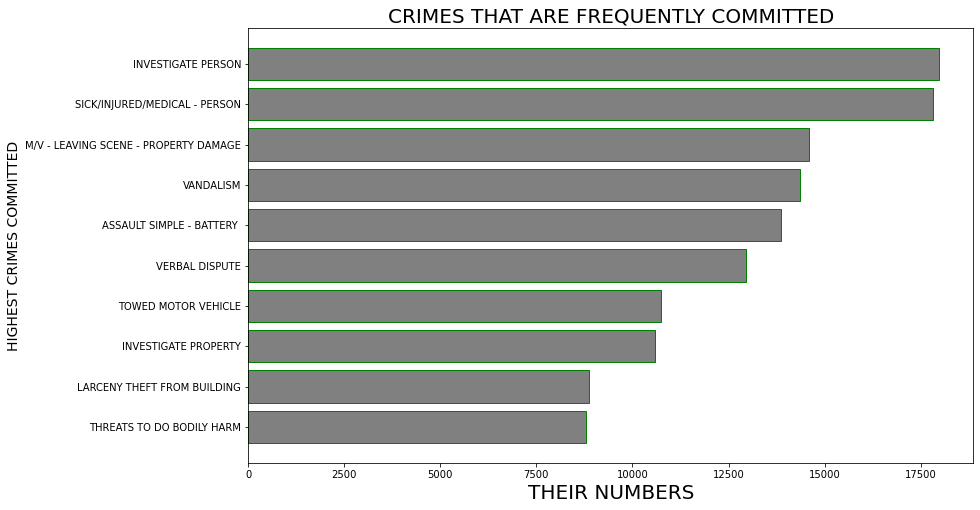

In [23]:
fig=plt.figure(figsize=(13,8))
plt.xlabel("THEIR NUMBERS", fontsize=20)
plt.ylabel("HIGHEST CRIMES COMMITTED", fontsize=14)
plt.title("CRIMES THAT ARE FREQUENTLY COMMITTED", fontsize=20)
plt.barh(first_10_crime,most_offence, color="gray", ec="green")
plt.show()

INVESTIGATE PERSON AND SICK/INJURED/MEDICAL - PERSON ARE LEADING THE RACE IN THE  MOST COMMITTED CRIME DATA

GETTING THE STREET THAT ARE CRIME PRONE USING ILOC, MAKING THE STREET A DATA OF ITS OWN AND PLOTTING IT IN A BAR CHART

In [25]:
most_offence1=crime.STREET.value_counts().iloc[:10].sort_values()
most_offence1

HYDE PARK AVE         3401
COMMONWEALTH AVE      3865
HARRISON AVE          4274
CENTRE ST             4284
MASSACHUSETTS AVE     4392
TREMONT ST            4663
DORCHESTER AVE        5007
BOYLSTON ST           6939
BLUE HILL AVE         6988
WASHINGTON ST        14107
Name: STREET, dtype: int64

In [24]:
street=('HYDE PARK AVE','COMMONWEALTH AVE', 'CENTRE ST','HARRISON AVE', 'MASSACHUSETTS AVE', 'TREMONT ST', 'DORCHESTER AVE', 'BOYLSTON ST', 'BLUE HILL AVE', 'WASHINGTON ST', )

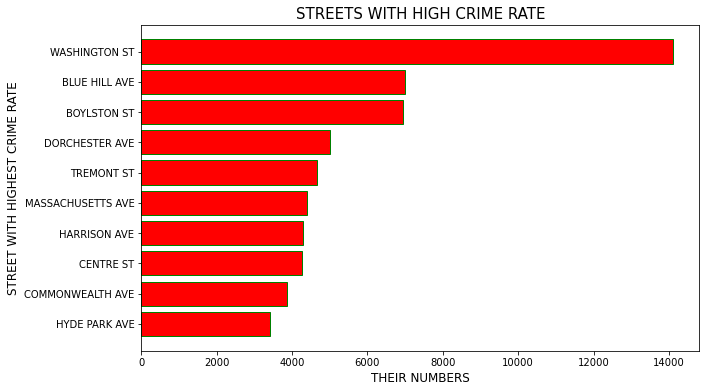

In [26]:
fig=plt.figure(figsize=(10,6))
plt.xlabel("THEIR NUMBERS", fontsize=12)
plt.ylabel("STREET WITH HIGHEST CRIME RATE", fontsize=12)
plt.title("STREETS WITH HIGH CRIME RATE", fontsize=15)
plt.barh(street,most_offence1, color="red", ec="green")
plt.show()

WASHINGTON STREET AND BLUE HILL AVENUE IS LEADING THE RACE IN THE STREET WITH HIGHEST CRIME RATE. 

LOOKING AT THE SHOOTING DISTRIBUTION IN THE FOUR YEARS, MORE SHOOTING HAPPENED IN 2017 THAT ANY OTHER YEAR. 

<AxesSubplot:title={'center':'YEAR WITH HIGHEST SHOOTING'}, xlabel='YEAR'>

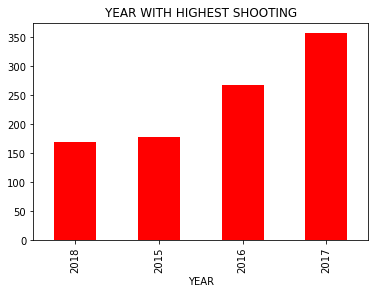

In [27]:
shooting_rate['SHOOTING'].head(4).plot.bar(color='red', title="YEAR WITH HIGHEST SHOOTING")

EXPLORING THE MONTH WITH HIGH CRIME RATE. 
FIRST USE ILOC AND VALUE COUNT TO GET THE MONTH WITH HIGH CRIME RATE. 
MAKE THE MONTHS WITH HIGHEST CRIME A DATA OF ITS OWN 
PLOT THE BAR CHART OF THE MONTH VALUE COUNT TO THE NEW DATA CREATED.

OBSERVATION: JUNE, JULY AND AUGUST HAS THE HIGHEST AMOUNT OF CRIME WHILE NOVEMBER, JANUARY AND MARCH HAS
THE LOWEST AMOUNT OF CRIME

In [28]:
month=crime.MONTH.value_counts().iloc[:10].sort_values()
month

11    22091
1     22187
3     22273
4     22410
10    23874
5     24219
9     24662
6     28496
7     32050
8     32205
Name: MONTH, dtype: int64

In [29]:
month_of_crime=['nov', 'jan', 'mar','apr', 'oct', 'may', 'sep', 'jun', 'jul', 'aug']

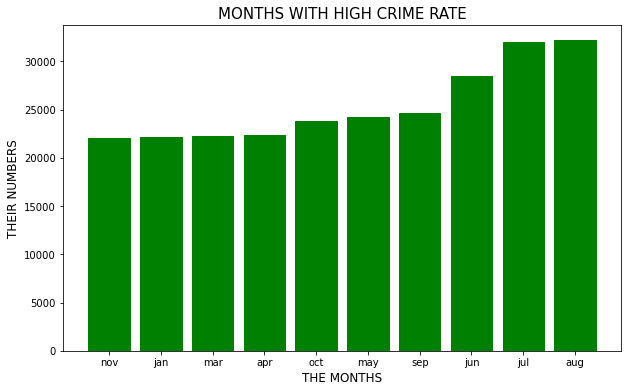

In [30]:
fig=plt.figure(figsize=(10,6))
plt.xlabel("THE MONTHS", fontsize=12)
plt.ylabel("THEIR NUMBERS", fontsize=12)
plt.title('MONTHS WITH HIGH CRIME RATE', fontsize=15)
plt.bar(month_of_crime,month, color="green", ec="green")
plt.show()

EXPLORING THE DAY WITH HIGH CRIME RATE. FIRST USE ILOC AND VALUE COUNT TO GET THE DAY AND THEIR CRIME RATE. 
MAKE THE DAYS WITH THEIR CRIME RATE A DATA OF ITS OWN PLOT THE BAR CHART OF THE DAYS VALUE COUNT TO THE NEW DATA CREATED.

OBSERVATION: FRIDAY, WEDNESDAY AND THURSDAY HAS THE HIGHEST AMOUNT OF CRIME WHILE SUNDAY,
SATURDAY AND MONDAY HAS THE LOWEST AMOUNT OF CRIME

In [31]:
day=crime.DAY_OF_WEEK.value_counts().iloc[:10].sort_values()
day

Sunday       37677
Saturday     41569
Monday       42469
Tuesday      42997
Thursday     43283
Wednesday    43445
Friday       45133
Name: DAY_OF_WEEK, dtype: int64

In [32]:
day_with_high_crime=['sun', 'sat', 'mon', 'tue', 'thur', 'wed', 'fri']

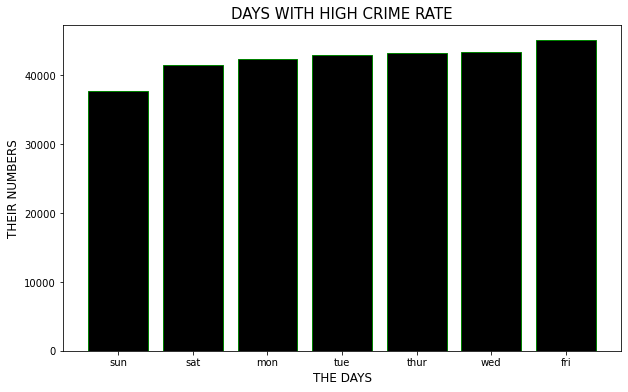

In [33]:
fig=plt.figure(figsize=(10,6))
plt.xlabel("THE DAYS", fontsize=12)
plt.ylabel("THEIR NUMBERS", fontsize=12)
plt.title('DAYS WITH HIGH CRIME RATE', fontsize=15)
plt.bar(day_with_high_crime,day, color="black", ec="green")
plt.show()

EXPLORING THE TIME WITH HIGH CRIME RATE. FIRST USE ILOC AND VALUE COUNT TO GET THE TIME AND THEIR CRIME RATE.
MAKE THE TIME WITH THEIR CRIME RATE A DATA OF ITS OWN PLOT THE BAR CHART OF THE TIME VALUE COUNT TO THE NEW DATA CREATED.

OBSERVATION: 4PM-6PM HAS THE HIGHEST AMOUNT OF CRIME 

In [34]:
time=crime.HOUR.value_counts().iloc[:10].sort_values()
time

15    15401
11    15414
10    15420
13    15769
14    16026
19    16288
12    17558
16    18420
18    18617
17    18982
Name: HOUR, dtype: int64

In [35]:
time_of_occurrance=['10am', '3pm', '11am', '1pm', '2pm', '7pm', '12pm', '4pm', '6pm', '5pm']

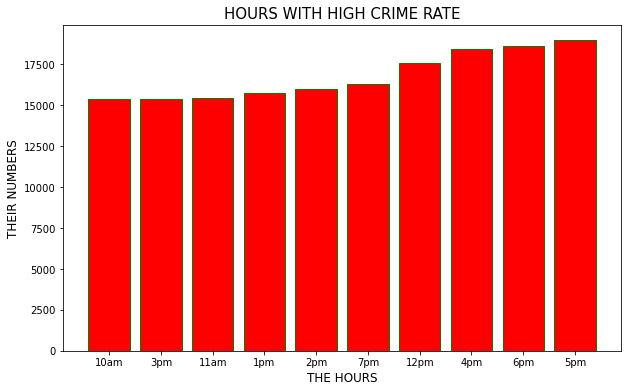

In [36]:
fig=plt.figure(figsize=(10,6))
plt.xlabel("THE HOURS", fontsize=12)
plt.ylabel("THEIR NUMBERS", fontsize=12)
plt.title('HOURS WITH HIGH CRIME RATE', fontsize=15)
plt.bar(time_of_occurrance,time, color="red", ec="green")
plt.show()

DOWNLOADING THE FILE FOR DASHBOARDING BUILDDING IN POWER BI 

In [37]:
crime.to_csv('C:\\Users\\user\\Downloads\\crime2.csv')